In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#XGBoost library
import xgboost as xgb
#importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing data sets
# train23 = pd.read_csv('train_feature_23variables.csv')
train23 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ST4052/project2/ST4052_dataAnalysisProject2_codes/train_feature_fraudcount_lag3.csv')
# train10 = pd.read_csv('train_feature_10variables.csv')

# test23 = pd.read_csv('test_feature_23variables.csv')
test23 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ST4052/project2/ST4052_dataAnalysisProject2_codes/test_feature_fraudcount_lag3.csv')
# test10 = pd.read_csv('test_feature_10variables.csv')

In [ ]:
test23.groupby('isFraud').count()

,Unnamed: 0,cashout_lag,oldbalanceOrg,amount,newbalanceDest,transfer_lag,oldbalanceDest,newbalanceOrig,fraud_count,TRANSFER,...,cashin_lag,debit_lag,fraudcount_lag6,fraudcount_lag1,fraudcount_lag7,fraudcount_lag9,fraudcount_lag8,fraudcount_lag2,fraudcount_lag5,fraudcount_lag3
isFraud,,,,,,,,,,,,,,,,,,,,,
0,65196,65196,65196,65196,65196,65196,65196,65196,65196,65196,...,65196,65196,65196,65196,65196,65196,65196,65196,65196,65196
1,748,748,748,748,748,748,748,748,748,748,...,748,748,748,748,748,748,748,748,748,748


Training set and Test set creation

In [ ]:
train23

,Unnamed: 0,cashout_lag,oldbalanceOrg,amount,newbalanceDest,transfer_lag,oldbalanceDest,newbalanceOrig,fraud_count,TRANSFER,...,debit_lag,fraudcount_lag6,fraudcount_lag1,fraudcount_lag7,fraudcount_lag9,fraudcount_lag8,fraudcount_lag2,fraudcount_lag5,fraudcount_lag3,isFraud
0,0,808370.660000,151994.59,151994.59,0.00,808370.660000,0.00,0.00,16,1.0,...,1474.600625,18.0,16.0,10.0,8.0,6.0,16.0,10.0,8.0,1
1,1,808370.660000,151994.59,151994.59,151994.59,808370.660000,0.00,0.00,16,0.0,...,1474.600625,18.0,16.0,10.0,8.0,6.0,16.0,10.0,8.0,1
2,2,808370.660000,4342582.37,4342582.37,0.00,808370.660000,0.00,0.00,16,1.0,...,1474.600625,18.0,16.0,10.0,8.0,6.0,16.0,10.0,8.0,1
3,3,808370.660000,4342582.37,4342582.37,9741064.96,808370.660000,5398482.58,0.00,16,0.0,...,1474.600625,18.0,16.0,10.0,8.0,6.0,16.0,10.0,8.0,1
4,4,808370.660000,67921.66,67921.66,0.00,808370.660000,0.00,0.00,16,1.0,...,1474.600625,18.0,16.0,10.0,8.0,6.0,16.0,10.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272719,272719,139924.172184,25718.40,120935.88,264887.30,508241.815556,143951.42,0.00,4,0.0,...,1346.408571,8.0,6.0,12.0,14.0,10.0,10.0,2.0,20.0,0
272720,272720,139924.172184,302141.00,159993.98,1106775.47,508241.815556,946781.49,142147.02,4,0.0,...,1346.408571,8.0,6.0,12.0,14.0,10.0,10.0,2.0,20.0,0
272721,272721,139924.172184,10500.00,184270.30,1049104.99,508241.815556,864834.69,0.00,4,0.0,...,1346.408571,8.0,6.0,12.0,14.0,10.0,10.0,2.0,20.0,0
272722,272722,139924.172184,0.00,13798.36,0.00,508241.815556,0.00,0.00,4,0.0,...,1346.408571,8.0,6.0,12.0,14.0,10.0,10.0,2.0,20.0,0


In [ ]:
X_train23 = train23.drop(['Unnamed: 0','isFraud'],axis = 1) 

In [ ]:
y_train23 = train23['isFraud']

In [ ]:
# X_train10 = train10.drop(['Unnamed: 0','isFraud'],axis = 1) 
# y_train10 = train10['isFraud']

Test set

In [ ]:
X_test23 = test23.drop(['Unnamed: 0','isFraud'],axis = 1) 
y_test23 = test23['isFraud']

In [ ]:
# X_test10 = test10.drop(['Unnamed: 0','isFraud'],axis = 1) 
# y_test10 = test10['isFraud']

In [ ]:
# pip install xgboost

In [ ]:
#Fitting XGB model without parameter tuning

In [ ]:
xgbc0 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)

modelF = xgbc0.fit(X_train23, y_train23)

In [ ]:
y_predF_train = modelF.predict(X_train23)

In [ ]:
y_predF_test = modelF.predict(X_test23)

In [ ]:
#confusion matrix
print(confusion_matrix(y_test23,y_predF_test))
print(classification_report(y_test23,y_predF_test))

[[63280  1916]
 [   53   695]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     65196
           1       0.27      0.93      0.41       748

    accuracy                           0.97     65944
   macro avg       0.63      0.95      0.70     65944
weighted avg       0.99      0.97      0.98     65944



In [ ]:
boost = xgb.XGBClassifier()
#train the model(23 variables)
modelF = boost.fit(X_train10, y_train10)
y_predF = modelF.predict(X_test10)

In [ ]:
#confusion matrix
print(confusion_matrix(y_test10,y_predF))
print(classification_report(y_test10,y_predF))

[[64880   316]
 [   32   716]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65196
           1       0.69      0.96      0.80       748

    accuracy                           0.99     65944
   macro avg       0.85      0.98      0.90     65944
weighted avg       1.00      0.99      1.00     65944



In [ ]:
# XG Boost  with parameter tuning (23 variable case)
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01,0.05],
    'booster': ['gbtree'],
    'gamma': [0, 0.5],
    'reg_alpha': [0.5 , 1],
    'reg_lambda': [0.5],
    'base_score': [0.2]
}

gs2 = GridSearchCV(xgb.XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(X_train23, y_train23)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'base_score': [0.2], 'booster': ['gbtree'],
                         'gamma': [0, 0.5], 'learning_rate': [0.01, 0.05],
                         'n_estimators': [100, 200], 'reg_alpha': [0.5, 1],
                         'reg_lambda': [0.5]},
             scoring='roc_auc')

In [ ]:
print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

Best score: 0.9993857811972467
Best score: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 0.05, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 0.5}


In [ ]:
Train_pred = gs2.predict(X_train23)
print(confusion_matrix(y_train23,Train_pred))
print(classification_report(y_train23,Train_pred ))

[[270531      5]
 [   206   1982]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    270536
           1       1.00      0.91      0.95      2188

    accuracy                           1.00    272724
   macro avg       1.00      0.95      0.97    272724
weighted avg       1.00      1.00      1.00    272724



In [ ]:
y_predF = gs2.predict(X_test23)
print(confusion_matrix(y_test23,y_predF))
print(classification_report(y_test23,y_predF))

[[65151    45]
 [   55   693]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65196
           1       0.94      0.93      0.93       748

    accuracy                           1.00     65944
   macro avg       0.97      0.96      0.97     65944
weighted avg       1.00      1.00      1.00     65944



In [ ]:
y_predF = modelF.predict(X_test10)
print(confusion_matrix(y_test10,y_predF))
print(classification_report(y_test10,y_predF))

[[64880   316]
 [   32   716]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65196
           1       0.69      0.96      0.80       748

    accuracy                           0.99     65944
   macro avg       0.85      0.98      0.90     65944
weighted avg       1.00      0.99      1.00     65944



In [ ]:
# Random forest with parameter tuning (10 variable case)
n_estimators = [100, 300]
max_depth = [5, 8]
min_samples_split = [2, 5, 100]
min_samples_leaf = [ 2, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF2 = gridF.fit(X_train10, y_train10)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
y_predF = bestF2.predict(X_test10)
print(confusion_matrix(y_test10,y_predF))
print(classification_report(y_test10,y_predF))

[[60218  4978]
 [   76   672]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     65196
           1       0.12      0.90      0.21       748

    accuracy                           0.92     65944
   macro avg       0.56      0.91      0.58     65944
weighted avg       0.99      0.92      0.95     65944



In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
rf_probs = bestF.predict_proba(X_test23)
rf_probs = rf_probs[:,1]

In [ ]:
rf_probs 

array([0.9999677 , 0.9997992 , 0.9999515 , ..., 0.99994814, 0.9999651 ,
       0.9998903 ], dtype=float32)

In [ ]:
r_probs = [0 for _ in range(len(y_test23))]

In [ ]:
r_auc = roc_auc_score(y_test23,r_probs)
rf_auc = roc_auc_score(y_test23,y_predF)

In [ ]:
print(r_auc)
print(rf_auc)

0.5
0.988011837936319


In [ ]:
r_fpr,r_tpr,_ = roc_curve(y_test23,r_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test23,y_predF)

In [ ]:
import matplotlib.pyplot as plt

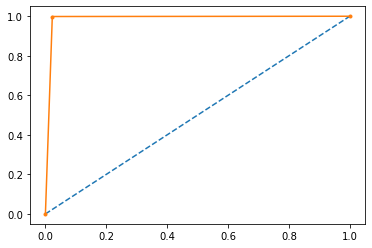

In [ ]:
plt.plot(r_fpr,r_tpr,linestyle='--')
plt.plot(rf_fpr,rf_tpr,marker='.')

In [ ]:
threshold = 0.1

predicted_proba = bestF.predict_proba(X_test23)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(y_test23, predicted))
print(classification_report(y_test23, predicted))

[[62492  2704]
 [    0   748]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     65196
           1       0.22      1.00      0.36       748

    accuracy                           0.96     65944
   macro avg       0.61      0.98      0.67     65944
weighted avg       0.99      0.96      0.97     65944



### Undersampling

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 
under_sampler = RandomUnderSampler(0.8)
X_train_us, y_train_us = under_sampler.fit_resample(X_train23, y_train23)
print(" The number of class before thw fit {}".format(Counter((y_train23))))
print(" The number of class after thw fit {}".format(Counter((y_train_us))))

 The number of class before thw fit Counter({0: 270536, 1: 2188})
 The number of class after thw fit Counter({0: 2735, 1: 2188})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
# XG Boost with parameter tuning (23 variable case)
model = xgb.XGBClassifier()
bestF = model.fit(X_train_us, y_train_us)

In [ ]:
# XG Boost with parameter tuning (23 variable case)
model = xgb.XGBClassifier()
bestF = model.fit(X_train_us, y_train_us)

In [ ]:
y_predF = bestF.predict(X_test23)
print(confusion_matrix(y_test23,y_predF))
print(classification_report(y_test23,y_predF))

[[63514  1682]
 [    3   745]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     65196
           1       0.31      1.00      0.47       748

    accuracy                           0.97     65944
   macro avg       0.65      0.99      0.73     65944
weighted avg       0.99      0.97      0.98     65944



In [ ]:
y_predF = bestF.predict(X_test23)
print(confusion_matrix(y_test23,y_predF))
print(classification_report(y_test23,y_predF))

[[63214  1982]
 [    2   746]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     65196
           1       0.27      1.00      0.43       748

    accuracy                           0.97     65944
   macro avg       0.64      0.98      0.71     65944
weighted avg       0.99      0.97      0.98     65944



In [ ]:
rf_probs = bestF.predict_proba(X_test23)
rf_probs = rf_probs[:,1]

r_auc = roc_auc_score(y_test23,r_probs)
rf_auc = roc_auc_score(y_test23,y_predF)

print(r_auc)
print(rf_auc)


NameError: ignored

In [ ]:
r_fpr,r_tpr,_ = roc_curve(y_test23,r_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test23,y_predF)

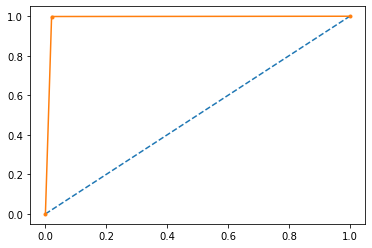

In [ ]:
plt.plot(r_fpr,r_tpr,linestyle='--')
plt.plot(rf_fpr,rf_tpr,marker='.')

In [ ]:
threshold = 0.01

predicted_proba = bestF.predict_proba(X_test23)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(y_test23, predicted))
print(classification_report(y_test23, predicted))

[[58004  7192]
 [    0   748]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     65196
           1       0.09      1.00      0.17       748

    accuracy                           0.89     65944
   macro avg       0.55      0.94      0.56     65944
weighted avg       0.99      0.89      0.93     65944



In [ ]:
a=list(bestF.predict(X_test23))


In [ ]:
a.count(0)

63216

In [ ]:
a.count(1)

2728

In [ ]:
import pickle

In [ ]:
with open('model23_us.pkl', 'wb') as files:
  pickle.dump(bestF, files)

### Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(0.5)
X_train_os,y_train_os = over_sampler.fit_resample(X_train23, y_train23)
print(" The number of class before thw fit {}".format(Counter((y_train23))))
print(" The number of class after thw fit {}".format(Counter((y_train_os))))

C:\Users\ACER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


 The number of class before thw fit Counter({0: 270536, 1: 2188})
 The number of class after thw fit Counter({0: 270536, 1: 135268})


In [ ]:
# XG Boost with parameter tuning (23 variable case)
model = xgb.XGBClassifier()
bestF = model.fit(X_train_os, y_train_os)

In [ ]:
y_predF = bestF.predict(X_test23)
print(confusion_matrix(y_test23,y_predF))
print(classification_report(y_test23,y_predF))

[[64867   329]
 [   14   734]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     65196
           1       0.69      0.98      0.81       748

    accuracy                           0.99     65944
   macro avg       0.85      0.99      0.90     65944
weighted avg       1.00      0.99      1.00     65944



In [ ]:
rf_probs = bestF.predict_proba(X_test23)
rf_probs = rf_probs[:,1]

r_auc = roc_auc_score(y_test23,r_probs)
rf_auc = roc_auc_score(y_test23,y_predF)

print(r_auc)
print(rf_auc)

0.5
0.9881185502998283


In [ ]:
r_fpr,r_tpr,_ = roc_curve(y_test23,r_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test23,y_predF)

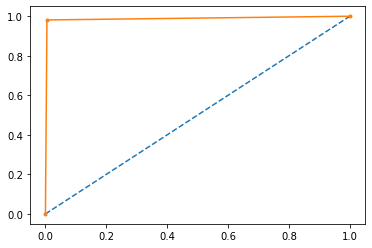

In [ ]:
plt.plot(r_fpr,r_tpr,linestyle='--')
plt.plot(rf_fpr,rf_tpr,marker='.')

In [ ]:
threshold = 0.0015

predicted_proba = bestF.predict_proba(X_test23)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(y_test23,predicted))
print(classification_report(y_test23, predicted))

[[60449  4747]
 [    0   748]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     65196
           1       0.14      1.00      0.24       748

    accuracy                           0.93     65944
   macro avg       0.57      0.96      0.60     65944
weighted avg       0.99      0.93      0.95     65944



### Synthetic Sampling

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
os = SMOTETomek(0.5)
X_train_ns,y_train_ns = os.fit_resample(X_train23,y_train23)
print(" The number of class before thw fit {}".format(Counter((y_train23))))
print(" The number of class after thw fit {}".format(Counter((y_train_ns))))

C:\Users\ACER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


 The number of class before thw fit Counter({0: 270536, 1: 2188})
 The number of class after thw fit Counter({0: 270481, 1: 135213})


In [ ]:
# XGB with parameter tuning (23 variable case)
model = xgb.XGBClassifier()
bestF = model.fit(X_train_ns, y_train_ns)

In [ ]:
y_predF = bestF.predict(X_test23)
print(confusion_matrix(y_test23,y_predF))
print(classification_report(y_test23,y_predF))

[[64871   325]
 [   14   734]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65196
           1       0.69      0.98      0.81       748

    accuracy                           0.99     65944
   macro avg       0.85      0.99      0.90     65944
weighted avg       1.00      0.99      1.00     65944



In [ ]:
rf_probs = bestF.predict_proba(X_test23)
rf_probs = rf_probs[:,1]

r_auc = roc_auc_score(y_test23,r_probs)
rf_auc = roc_auc_score(y_test23,y_predF)

print(r_auc)
print(rf_auc)

0.5
0.9881492270284619


In [ ]:
r_fpr,r_tpr,_ = roc_curve(y_test23,r_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test23,y_predF)

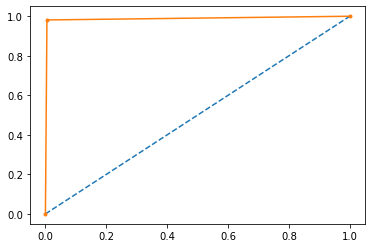

In [ ]:
plt.plot(r_fpr,r_tpr,linestyle='--')
plt.plot(rf_fpr,rf_tpr,marker='.')


In [ ]:
threshold = 0.025

predicted_proba = bestF.predict_proba(X_test23)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(y_test23,predicted))
print(classification_report(y_test23, predicted))

[[63734  1462]
 [    1   747]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     65196
           1       0.34      1.00      0.51       748

    accuracy                           0.98     65944
   macro avg       0.67      0.99      0.75     65944
weighted avg       0.99      0.98      0.98     65944



In [ ]:
# This is the best Model According to us

#Partial Dependence Plots

In [ ]:
from sklearn.inspection.partial_dependence import partial_dependence, plot_partial_dependence

In [ ]:
from sklearn.inspection import plot_partial_dependence

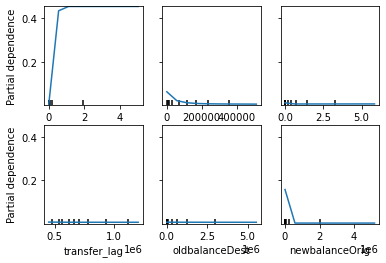

In [ ]:

my_plots = plot_partial_dependence(bestF,       
                                   features=[1,2,3,4,5,6], # column numbers of plots we want to show
                                   X=X_train23,            # raw predictors data.
                                    # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


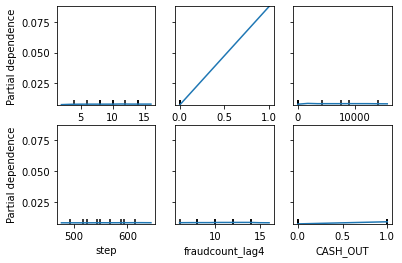

In [ ]:
my_plots = plot_partial_dependence(bestF,       
                                   features=[7,8,9,10,11,12], # column numbers of plots we want to show
                                   X=X_train23,            # raw predictors data.
                                    # labels on graphs
                                   grid_resolution=10)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


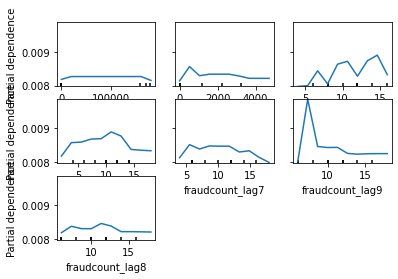

In [ ]:
my_plots = plot_partial_dependence(bestF,       
                                   features=[13,14,15,16,17,18,19], # column numbers of plots we want to show
                                   X=X_train23,            # raw predictors data.
                                    # labels on graphs
                                   grid_resolution=10)

For 10 Variable case